
### Arima

<BR>Since the time series is not stationary, I decided to use AutoRegressive Integrated Moving Average. 
<BR>This technique uses the value at the previous time step to predict the expected output at the current step. 
<BR>Caters to a suite of standard structures in time series data, and as such provides a simple yet powerful method for making skillful time series forecasts.
<BR>
<BR>Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
<BR>Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
<BR>Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.
<BR>The parameters of the ARIMA model are defined as follows:
<BR>
<BR>p: The number of lag observations included in the model, also called the lag order.
<BR>d: The number of times that the raw observations are differenced, also called the degree of differencing.
<BR>q: The size of the moving average window, also called the order of moving average.
<BR>
<BR>Data set from: 
 https://www.ncdc.noaa.gov/data-access/marineocean-data/noaa-global-surface-temperature-noaaglobaltemp
<BR>NOAA Merged Land Ocean Global Surface Temperature Analysis (NOAAGlobalTemp)
<BR>
<BR>Data: NCEI spatial average time series of monthly data
<BR>Read the file:
<BR>From: https://www.ncdc.noaa.gov/data-access/marineocean-data/noaa-global-surface-temperature-noaaglobaltemp
<BR>
<BR>Ascii Time Series: ftp://ftp.ncdc.noaa.gov/pub/data/noaaglobaltemp/operational/
<BR>Monthly and annual land–ocean temperature time series 
<BR>are available from 1880 to present for several zonal bands
<BR>file name convention for areal average (aravg) time series:
<BR>ann=annual average
<BR>mon=monthly average
<BR>land_ocean=merged land-ocean surface temperature
<BR>land=land surface temperature for air
<BR>ocean=ocean surface temperature for water
<BR>latitudes=southern and northern limits of areal average
<BR>v=version number
<BR>yyyymm=date for the latest data
<BR>
<BR>Monthly data (aravg.mon.*) :
<BR>1st column = year
<BR>2nd column = month
<BR>3rd column = anomaly of temperature (K)
<BR>4th column = total error variance (K**2)
<BR>5th column = high-frequency error variance (K**2)
<BR>6th column = low-frequency error variance (K**2)
<BR>7th column = bias error variance (K**2)
<BR>8th column = diagnostic variable
<BR>9th column = diagnostic variable
<BR>10th column= diagnostic variable
<BR>
    
<BR><BR>
<BR>Reference: 
<BR>Brownlee, Jason. How to Create an ARIMA Model for Time Series Forecasting in Python. (2016, December 26)<BR>Retrieved from  https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
<BR>

In [1]:

# - Load libraries

from pandas import DataFrame
from pandas import concat
from pandas import read_csv
import itertools
from pandas import datetime
import warnings
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
import matplotlib
# be able to save images on server
matplotlib.use('Agg')
from matplotlib import pyplot
import numpy
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.


In [2]:
# load dataset
def parser(x):
	return datetime.strptime(x, '%Y-%m')
series = read_csv('/Users/maggie/Documents/dataScience/practicum2/data/monthlyClean2.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# summarize first few rows
print(series.head())

YearMonth
1880-01-01   -0.239575
1880-02-01   -0.376476
1880-03-01   -0.395847
1880-04-01   -0.296963
1880-05-01   -0.309813
Name: TempAnomaly, dtype: float64


<function print>

Shape:
(1665,)


<function print>

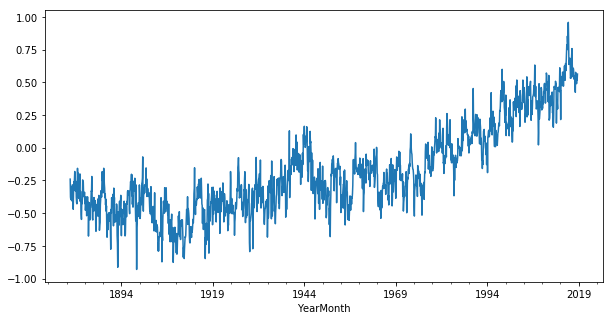

In [3]:
# A line plot of the series is then created showing a increasing trend.
print
print('Shape:')
print(series.shape)
print

%matplotlib inline
pyplot.rcParams['figure.figsize'] = [10, 5]
series.plot()
pyplot.show()

# We can see that the data set has a clear trend.



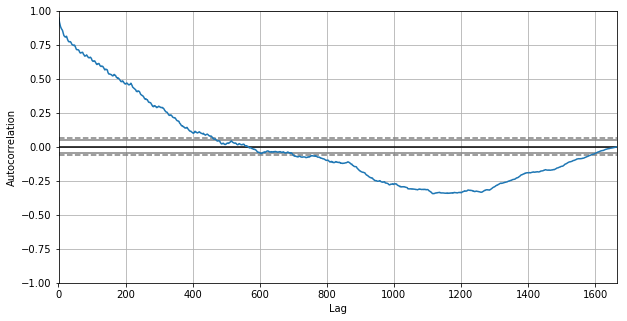

In [4]:
# Plot autocorrelation: 
autocorrelation_plot(series)
pyplot.show()

# we can see that there is a positive correlation with the first 400 lags 
# that is perhaps significant for the first 200 lags.



In [5]:
k=0
highestCorr = 0
for i in range(1,10):
    cor = pd.Series.autocorr(series, lag=i)
    if(cor > highestCorr):
        highestCorr = cor
        k=i
highestCorr

0.950603850761966

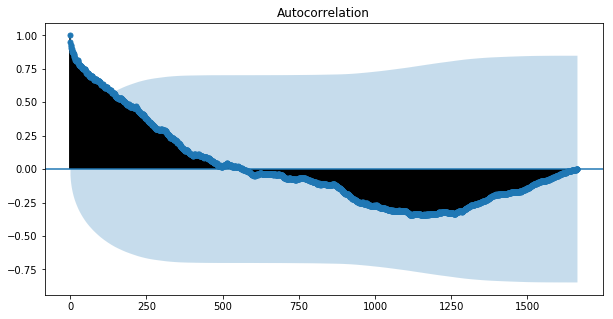

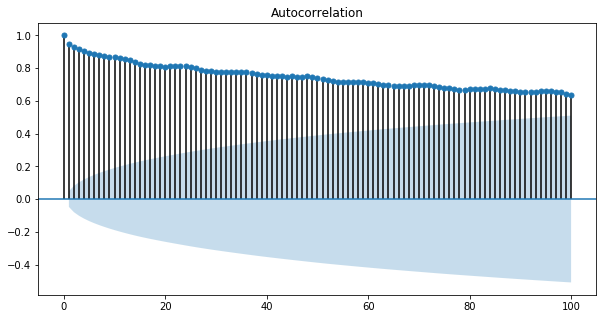

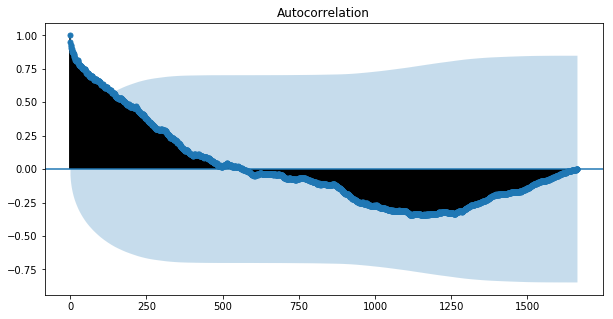

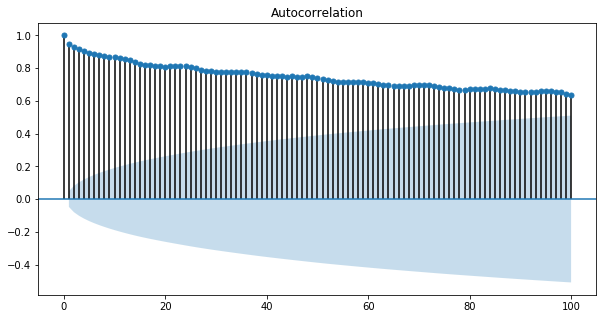

In [6]:
plot_acf(series)
plot_acf(series, lags=100)


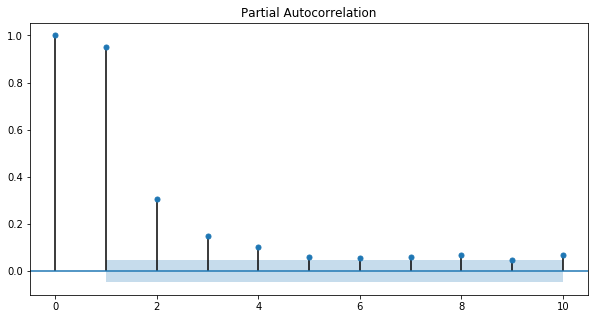

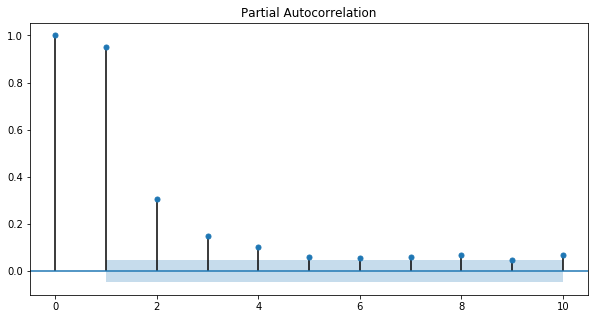

In [7]:

plot_pacf(series, lags=10)
pyplot.show()

In [8]:
model = ARIMA(series, order=(1,1,0))


/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [9]:
model_fit = model.fit(disp=0)
print(model_fit.summary())


                             ARIMA Model Results                              
Dep. Variable:          D.TempAnomaly   No. Observations:                 1664
Model:                 ARIMA(1, 1, 0)   Log Likelihood                1486.794
Method:                       css-mle   S.D. of innovations              0.099
Date:                Sat, 15 Dec 2018   AIC                          -2967.589
Time:                        14:24:36   BIC                          -2951.338
Sample:                    02-01-1880   HQIC                         -2961.566
                         - 09-01-2018                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0005      0.002      0.272      0.786      -0.003       0.004
ar.L1.D.TempAnomaly    -0.3304      0.023    -14.276      0.000      -0.376      -0.285
                

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for 

In [10]:
print(model_fit.summary().tables[1])

                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0005      0.002      0.272      0.786      -0.003       0.004
ar.L1.D.TempAnomaly    -0.3304      0.023    -14.276      0.000      -0.376      -0.285


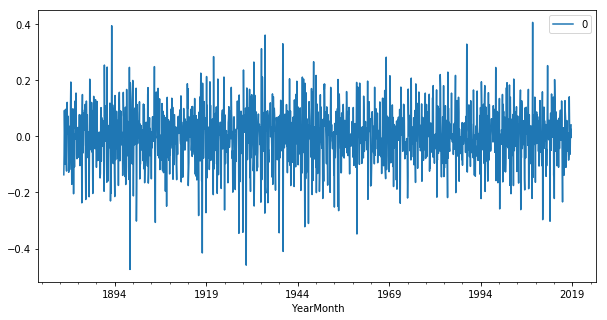

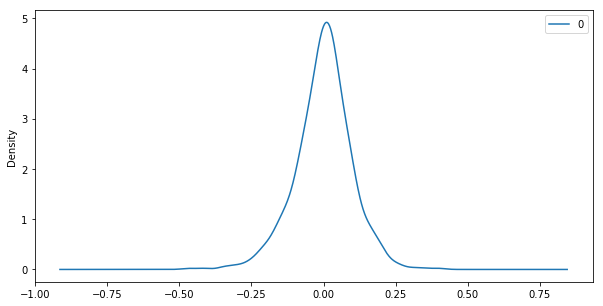

                 0
count  1664.000000
mean     -0.000027
std       0.099051
min      -0.474284
25%      -0.052902
50%       0.004580
75%       0.057598
max       0.405193


In [11]:
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [12]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))


predicted=-0.362820, expected=-0.293705
predicted=-0.318285, expected=-0.291353
predicted=-0.292110, expected=-0.263103
predicted=-0.271904, expected=-0.286668
predicted=-0.279334, expected=-0.182867


/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for 

predicted=-0.215160, expected=-0.295866
predicted=-0.260551, expected=-0.496522
predicted=-0.434443, expected=-0.430014
predicted=-0.450871, expected=-0.276504
predicted=-0.324079, expected=-0.227100
predicted=-0.242300, expected=-0.238824
predicted=-0.235166, expected=-0.168073
predicted=-0.189797, expected=-0.163120
predicted=-0.164520, expected=-0.133272
predicted=-0.142321, expected=-0.196358
predicted=-0.176791, expected=-0.120131
predicted=-0.143509, expected=-0.142388
predicted=-0.135358, expected=-0.020603
predicted=-0.057966, expected=0.003780
predicted=-0.003422, expected=0.105966
predicted=0.074890, expected=0.047886
predicted=0.066187, expected=-0.012829
predicted=0.006192, expected=-0.038461
predicted=-0.030292, expected=-0.049975
predicted=-0.046169, expected=-0.110664
predicted=-0.091785, expected=-0.145514
predicted=-0.134642, expected=-0.163575
predicted=-0.157892, expected=-0.165334
predicted=-0.164669, expected=-0.197187
predicted=-0.187301, expected=-0.247065
predic

predicted=0.094521, expected=0.103659
predicted=0.110499, expected=0.134519
predicted=0.124923, expected=0.452632
predicted=0.350442, expected=0.221877
predicted=0.297663, expected=0.171202
predicted=0.188081, expected=0.159465
predicted=0.163703, expected=0.114352
predicted=0.129363, expected=0.121063
predicted=0.119281, expected=0.091574
predicted=0.101497, expected=0.213410
predicted=0.174374, expected=0.254924
predicted=0.242010, expected=0.169275
predicted=0.197459, expected=0.193270
predicted=0.185962, expected=0.196711
predicted=0.196063, expected=0.088677
predicted=0.124029, expected=0.251219
predicted=0.198941, expected=0.154035
predicted=0.186074, expected=0.230890
predicted=0.206365, expected=0.210491
predicted=0.217612, expected=0.159134
predicted=0.176279, expected=0.163667
predicted=0.162624, expected=0.117494
predicted=0.132908, expected=0.099791
predicted=0.105919, expected=0.029877
predicted=0.052918, expected=0.218162
predicted=0.157256, expected=0.181729
predicted=0.

predicted=0.087070, expected=0.113654
predicted=0.083074, expected=0.489199
predicted=0.364104, expected=0.219049
predicted=0.310795, expected=0.247539
predicted=0.238390, expected=0.284529
predicted=0.272550, expected=0.349416
predicted=0.328103, expected=0.336639
predicted=0.341471, expected=0.312239
predicted=0.320963, expected=0.460048
predicted=0.410880, expected=0.448453
predicted=0.452981, expected=0.288791
predicted=0.343005, expected=0.344398
predicted=0.326219, expected=0.300115
predicted=0.315516, expected=0.303381
predicted=0.302780, expected=0.389253
predicted=0.360924, expected=0.336469
predicted=0.354766, expected=0.429324
predicted=0.398646, expected=0.417344
predicted=0.421974, expected=0.477633
predicted=0.457971, expected=0.491451
predicted=0.487456, expected=0.433460
predicted=0.453597, expected=0.453636
predicted=0.447466, expected=0.341273
predicted=0.379655, expected=0.448607
predicted=0.413019, expected=0.440733
predicted=0.444000, expected=0.570820
predicted=0.

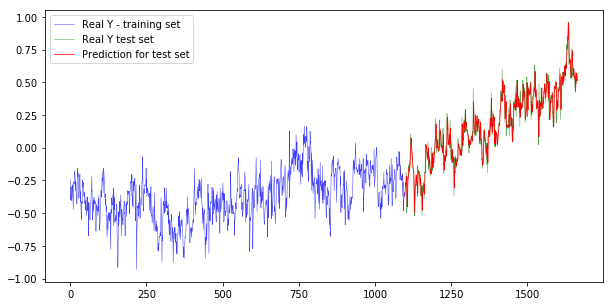

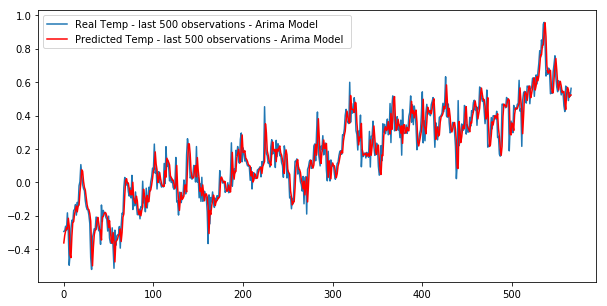

In [13]:
# plot

pyplot.plot(train,color='blue', label = 'Real Y - training set', lw = 0.5, alpha = 0.75)
pyplot.plot([None for i in train] + [x for x in test], color='green', label = 'Real Y test set', lw = 0.5, alpha = 0.75)
pyplot.plot([None for i in train] + [x for x in predictions], color='red', label = 'Prediction for test set',lw = 0.75, alpha = 1)
pyplot.legend()
pyplot.show()
    
pyplot.plot(test, label = 'Real Temp - last 500 observations - Arima Model ')
pyplot.plot(predictions, color='red', label = 'Predicted Temp - last 500 observations - Arima Model ')
pyplot.legend()
pyplot.show()

In [14]:
mse = mean_squared_error(test, predictions)
print('Test MSE: %.5f' % mse)

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.5f' % rmse)


# MSE: Mean Squared Error - The average of the squre difference between what the estimated 
#   values and what is estimated. 
# RMSE: Square root of the variance of the residuals. 
# Standard deviation of the unaxplained variance. 
# Same units as the response variables or dependent variable

# R-squared is a statistical measure of how close the data are to the fitted regression line. 
# Best Possible is 1
r2score = r2_score(test, predictions)
print('Goodness of fit: %.5f' % r2score)
# 0.098 - RMSE for Persistance
# 0.098 - RMSE for HoltWinters seasonal
# If RMSE is 0 then the time series is a flat straight line 

Test MSE: 0.00825
Test RMSE: 0.09082
Goodness of fit: 0.88442
